In the space available below, include your variable statistics and the Visualizations associated with them. These should show information that will be pertinent to your analysis. Do not choose random categories to analyze and visualize. Below the visualizations, describe what you see in the data and how it helps you understand your question.

Requirements:

- 1 pearson r correlation coefficient
- 1 t-test
- 1 ANOVA
- 1 visualization for each of the different tests.
- There should be at least 3 visualizations, and at least 3 different types of visualizations (e.g. scatter plot, bar chart, box plot, histogram, etc.)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/CO2 Emissions_Canada.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [33]:
import pandas as pd
import scipy.stats as stats

stats.pearsonr(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])

PearsonRResult(statistic=0.8511446437900011, pvalue=0.0)

In [34]:
r, p = stats.pearsonr(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
print(f"r: {round(r, 3)}, p: {round(p, 10)}")

r: 0.851, p: 0.0


I chose these variables because engine size is related to a vehicle's power output and it can be expected for larger engines to produce more CO2 emissions. There is a strong positive correlation (0.851) between engine size and CO2 emissions. A p-value of 0.0 also indicates that this correlation is statistically significant.

As engine size increases, CO2 emisions also tend to increase which will be crucial when considering vehicle performance and environmental impact.

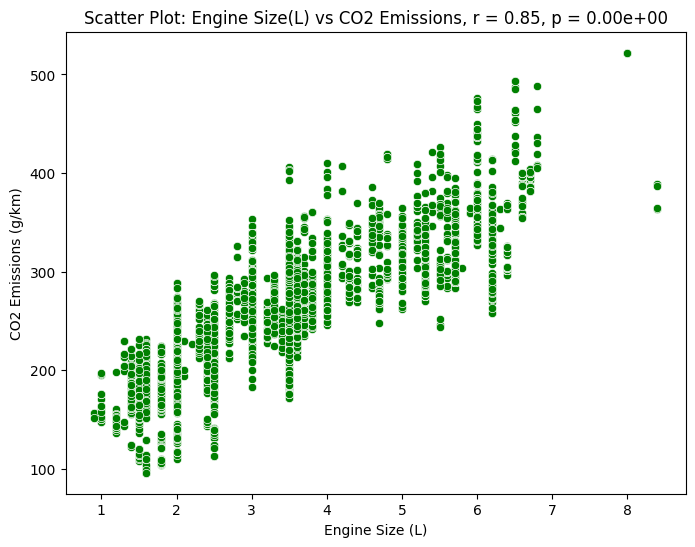

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
s = sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, color="green")
plt.title(f"Scatter Plot: Engine Size(L) vs CO2 Emissions, r = {r:.2f}, p = {p:.2e}")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


A scatterplot was chosen to represent engine size and CO2 emissions because it is ideal for continuous variables. By visualizing this, we can see the correlation between the variables.

The green dots represent each individual vehicle. The trend in this plot shows that as engine size increases, CO2 emissions increase.

In [37]:
four_cylinder = df[df["Cylinders"] == 4]["CO2 Emissions(g/km)"]
six_cylinder = df[df["Cylinders"] == 6]["CO2 Emissions(g/km)"]

t,p = stats.ttest_ind(four_cylinder, six_cylinder)

print(f't: {t}, p: {p}')


t: -71.49826354974948, p: 0.0


Larger engines tend to produce more CO2, which is why this comparison would be meaningful for understanding how many cylinders in a vehicle affects emissions.

Our t-statistic tells us that there is a significant difference between cylinders and CO2 emissions. The p-value also indicates that this difference is statistically significant.

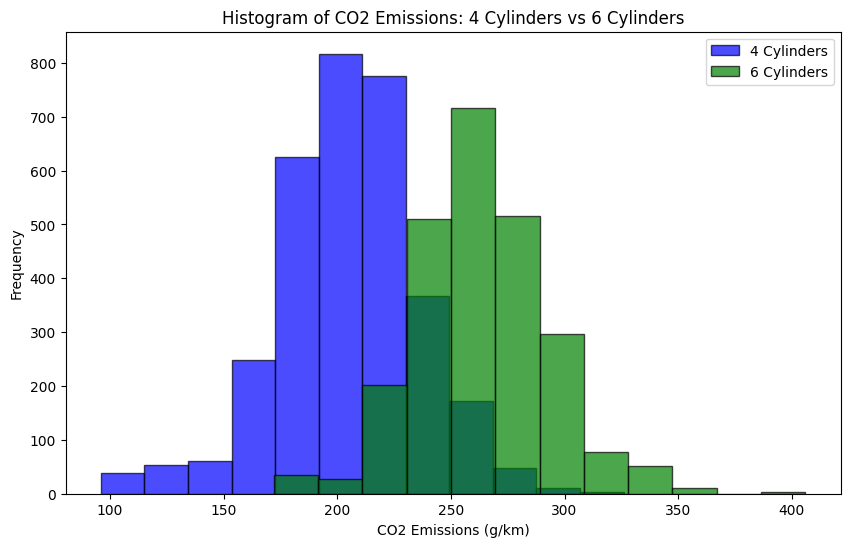

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(four_cylinder, bins=12, alpha=0.7, label="4 Cylinders", color="blue", edgecolor="black")
plt.hist(six_cylinder, bins=12, alpha=0.7, label="6 Cylinders", color="green", edgecolor="black")

plt.title("Histogram of CO2 Emissions: 4 Cylinders vs 6 Cylinders")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

A histogram is ideal for showcasing the distribution of continuous data. Based on the graph, we are able to visualize the frequency of CO2 emissions for the two cylinder counts.

Aggregating the data into two groups helps us understand whether 4 or 6 cylinders influences CO2 emissions. Vehicles with 4 cylinders tend to have higher emissions, though there can be other factors that influence this. The overlap may indicate cases where they have similar levels of CO2 emissions.

In [59]:
compact = df[df["Vehicle Class"] == "COMPACT"]["Fuel Consumption City (L/100 km)"]
mid_size = df[df["Vehicle Class"] == "MID-SIZE"]["Fuel Consumption City (L/100 km)"]
suv_standard = df[df["Vehicle Class"] == "SUV - STANDARD"]["Fuel Consumption City (L/100 km)"]

f_return = stats.f_oneway(compact, mid_size, suv_standard)

print(f_return)


F_onewayResult(statistic=645.6234490076906, pvalue=1.778074735838895e-232)


Vehicle classes have distinct characteristics which can affect fuel consumption. I also chose fuel consumption in the city specifically because driving in the city generally results in higher fuel consumption compared to driving on the highway.

An F-statistic of 645.62 indicates a large variation between the means of fuel consumption for the three vehicle classes. The p-value of 0.00 indicates that the differences in fuel consumption in the city across the three vehicle classes are statistically significant.

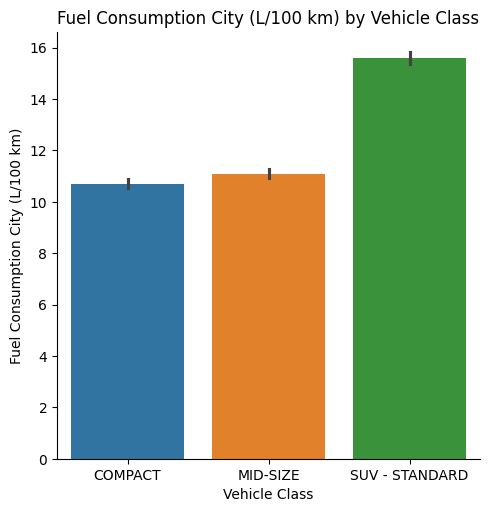

In [57]:
c = sns.catplot(data=df[df["Vehicle Class"].isin(["COMPACT", "MID-SIZE", "SUV - STANDARD"])], x='Vehicle Class', y='Fuel Consumption City (L/100 km)', hue='Vehicle Class', kind='bar')
plt.title('Fuel Consumption City (L/100 km) by Vehicle Class')
plt.show()

A bar chart is ideal for categorical data with corresponding numeric values. Here, I aggregated the data by vehicle class so I can observe three classes instead of looking at each individual class.

Compact vehicles show the lowest fuel consumption, as expected since smaller vehicles with less powerful engines are more efficient. SUVs being the largest and heaviest has the highest fuel consumption from this chart.